# Problem Set 3

## Question 1

In [1]:
import pandas as pd

In [3]:
file_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

In [5]:
users = pd.read_csv(file_url, sep='|')

### Mean age per occupation

In [97]:
mean_age=users.groupby('occupation')['age'].mean().reset_index()
mean_age.columns=["occupation","mean_age"]
print(f"Mean age per occupation is:\n{mean_age}")

Mean age per occupation is:
       occupation   mean_age
0   administrator  38.746835
1          artist  31.392857
2          doctor  43.571429
3        educator  42.010526
4        engineer  36.388060
5   entertainment  29.222222
6       executive  38.718750
7      healthcare  41.562500
8       homemaker  32.571429
9          lawyer  36.750000
10      librarian  40.000000
11      marketing  37.615385
12           none  26.555556
13          other  34.523810
14     programmer  33.121212
15        retired  63.071429
16       salesman  35.666667
17      scientist  35.548387
18        student  22.081633
19     technician  33.148148
20         writer  36.311111


###  Male ratio per occupation

In [95]:
male_users=users[users.gender == "M"].groupby('occupation')['gender'].count()
m_f_users=users.groupby('occupation')['gender'].count()
male_ratio=male_users/m_f_users
sorted_male_ratio=male_ratio.sort_values(ascending=False).reset_index()
sorted_male_ratio.columns=["occupation", "ratio"]
print(f"The Male ratio per occupation sorted is: \n{sorted_male_ratio}")

The Male ratio per occupation sorted is: 
       occupation     ratio
0          doctor  1.000000
1        engineer  0.970149
2      technician  0.962963
3         retired  0.928571
4      programmer  0.909091
5       executive  0.906250
6       scientist  0.903226
7   entertainment  0.888889
8          lawyer  0.833333
9        salesman  0.750000
10       educator  0.726316
11        student  0.693878
12          other  0.657143
13      marketing  0.615385
14         writer  0.577778
15           none  0.555556
16  administrator  0.544304
17         artist  0.535714
18      librarian  0.431373
19     healthcare  0.312500
20      homemaker  0.142857


###  Minimum and maximum ages per occupation

In [93]:
min_max_age_per_occ=users.groupby("occupation")['age'].agg(['min','max']).reset_index()
min_max_age_per_occ.columns = ["occupation", "min_age", "max_age"]
print(f"The minimum and maximum ages per occupation is \n{min_max_age_per_occ}")

The minimum and maximum ages per occupation is 
       occupation  min_age  max_age
0   administrator       21       70
1          artist       19       48
2          doctor       28       64
3        educator       23       63
4        engineer       22       70
5   entertainment       15       50
6       executive       22       69
7      healthcare       22       62
8       homemaker       20       50
9          lawyer       21       53
10      librarian       23       69
11      marketing       24       55
12           none       11       55
13          other       13       64
14     programmer       20       63
15        retired       51       73
16       salesman       18       66
17      scientist       23       55
18        student        7       42
19     technician       21       55
20         writer       18       60


###  Mean age for each combination of occupation and sex

In [91]:
mean_age_with_sex=users.groupby(["occupation","gender"])["age"].mean().reset_index()
mean_age_with_sex.columns = ["occupation", "gender", "mean_age"]
print(f"The mean age for each combination of occupation and sex is \n{mean_age_with_sex}")

The mean age for each combination of occupation and sex is 
       occupation gender   mean_age
0   administrator      F  40.638889
1   administrator      M  37.162791
2          artist      F  30.307692
3          artist      M  32.333333
4          doctor      M  43.571429
5        educator      F  39.115385
6        educator      M  43.101449
7        engineer      F  29.500000
8        engineer      M  36.600000
9   entertainment      F  31.000000
10  entertainment      M  29.000000
11      executive      F  44.000000
12      executive      M  38.172414
13     healthcare      F  39.818182
14     healthcare      M  45.400000
15      homemaker      F  34.166667
16      homemaker      M  23.000000
17         lawyer      F  39.500000
18         lawyer      M  36.200000
19      librarian      F  40.000000
20      librarian      M  40.000000
21      marketing      F  37.200000
22      marketing      M  37.875000
23           none      F  36.500000
24           none      M  18.600000
25  

### Percentage of women and men per occupation

In [166]:
percentage_gender_per_occupation = users.groupby(['occupation', 'gender']).size().unstack(fill_value=0)
percentage_gender_per_occupation = percentage_gender_per_occupation.div(percentage_gender_per_occupation.sum(axis=1), axis=0) * 100
print(f"The percentage of women and men per occupation \n{percentage_gender_per_occupation}")

The percentage of women and men per occupation 
gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor          0.000000  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


## Question 2

In [297]:
import pandas as pd
import numpy as np

In [173]:
url="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12=pd.read_csv(url)

### The goals column

In [194]:
goals=euro12["Goals"]
print(f"The goals column is:\n{goals}")

The goals column is:
0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


### Teams participated in Euro2012

In [221]:
team_count=euro12['Team'].nunique()
print(f"The number of teams that participated in Euro 2012 is: \n{team_count}")

The number of teams that participated in Euro 2012 is: 
16


### The number of columns in the dataset

In [232]:
col_num=euro12.shape[1]
print(f"The number of columns is: \n{col_num}")

The number of columns is: 
35


### Yellow Cards and Red Cards per team

In [244]:
discipline=euro12[['Team','Yellow Cards','Red Cards']]
print(f"Yellow Cards and Red Cards per team: \n{discipline}")

Yellow Cards and Red Cards per team: 
                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


### Sort team by Red Cards, then to Yellow Cards

In [276]:
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'],ascending=[True, True])
print(f"Sorted team by Red Cards, then to Yellow Cards is: \n{discipline_sorted}")

Sorted team by Red Cards, then to Yellow Cards is: 
                   Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
12               Russia             6          0
1        Czech Republic             7          0
14               Sweden             7          0
0               Croatia             9          0
13                Spain            11          0
10             Portugal            12          0
7                 Italy            16          0
11  Republic of Ireland             6          1
9                Poland             7          1
6                Greece             9          1


###  Mean Yellow Cards given per Team

In [270]:
mean_yellow_cards = discipline['Yellow Cards'].mean()
print(f"The  mean Yellow Cards given per team is: \n{mean_yellow_cards}")

The  mean Yellow Cards given per team is: 
7.4375


### Teams that scored more than 6 goals

In [282]:
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
print(f"teams that scored more than 6 goals is: \n{teams_more_than_6_goals[['Team', 'Goals']]}")

teams that scored more than 6 goals is: 
       Team  Goals
5   Germany     10
13    Spain     12


### Teams that starts with G

In [285]:
teams_start_with_g = euro12[euro12['Team'].str.startswith('G')]
print(f"teams that starts with G is: \n{teams_start_with_g[['Team']]}")

teams that starts with G is: 
      Team
5  Germany
6   Greece


### First seven columns are

In [288]:
first_7_columns=euro12.iloc[:,:7]
print(f"The first 7 columns are: \n{first_7_columns}")

The first 7 columns are: 
                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13      

### All columns except the last 3 columns

In [291]:
all_but_last_3 = euro12.iloc[:, :-3]
print(f"All but last 3 columns are: \n{all_but_last_3}")

All but last 3 columns are: 
                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13   

###  Shooting Accuracy from England, Italy and Russia

In [294]:
shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print(f"The  Shooting Accuracy from England, Italy and Russia are: \n{shooting_accuracy}")

The  Shooting Accuracy from England, Italy and Russia are: 
       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


## Question 3

In [299]:
import pandas as pd
import numpy as np

### Create 3 different Series, each of length 100

In [308]:
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

### Create a DataFrame by joinning the Series by column

In [328]:
df = pd.DataFrame({ 
    'col1': series1, 
    'col2': series2, 
    'col3': series3 })
print("the dataframe is")
print(df)

the dataframe is
    col1  col2   col3
0      1     2  28334
1      3     3  26626
2      3     3  22628
3      3     2  15397
4      1     3  25901
..   ...   ...    ...
95     1     1  28748
96     3     3  20450
97     2     3  17509
98     3     1  14724
99     2     2  12925

[100 rows x 3 columns]


### Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [330]:
df.columns=['bedrs','bathrs','price_sqr_meter']
print("the dataframe is")
print(df)

the dataframe is
    bedrs  bathrs  price_sqr_meter
0       1       2            28334
1       3       3            26626
2       3       3            22628
3       3       2            15397
4       1       3            25901
..    ...     ...              ...
95      1       1            28748
96      3       3            20450
97      2       3            17509
98      3       1            14724
99      2       2            12925

[100 rows x 3 columns]


### Create a one column DataFrame with the values of the 3 Series and assign it 
t 'bigcolumn

In [337]:
bigcolumn = pd.concat([series1, series2, series3], axis=0).reset_index(drop=True).to_frame(name='bigcolumn')
print("the one column dataframe is :")
print(bigcolumn)

the one column dataframe is :
     bigcolumn
0            1
1            3
2            3
3            3
4            1
..         ...
295      28748
296      20450
297      17509
298      14724
299      12925

[300 rows x 1 columns]


### Does the DataFrame go only until index 99? 

In [342]:
max_index = bigcolumn.index.max()
print(f"Does the DataFrame go only until index 99? \n{max_index == 99}")

Does the DataFrame go only until index 99? 
False


### Reindex the DataFrame so it goes from 0 to 299

In [346]:
bigcolumn = bigcolumn.reindex(range(300)).reset_index(drop=True)
print("Reindexed DataFrame:")
print(bigcolumn)

Reindexed DataFrame:
     bigcolumn
0            1
1            3
2            3
3            3
4            1
..         ...
295      28748
296      20450
297      17509
298      14724
299      12925

[300 rows x 1 columns]


# Question 4

In [349]:
import pandas as pd
import numpy as np

In [415]:
data = pd.read_csv('wind.txt', sep=r'\s+')
print(f"The imported file is: {data.head()}")

The imported file is:    Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0  61   1   1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1  61   1   2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2  61   1   3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
3  61   1   4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
4  61   1   5  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

     CLO    BEL    MAL  
0  12.58  18.50  15.04  
1   9.67  17.54  13.83  
2   7.67  12.75  12.71  
3   5.88   5.46  10.88  
4  10.34  12.92  11.83  


In [417]:
data['Date'] = pd.to_datetime({'year': data['Yr'] + 1900, 'month': data['Mo'], 'day': data['Dy']})
data = data.drop(['Yr', 'Mo', 'Dy'], axis=1)
data.set_index('Date', inplace=True)
print(data)

              RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL  \
Date                                                                        
1961-01-01  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
1978-12-27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59  14.04   
1978-12-28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25  15.25   
1978-12-29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46  14.50   
1978-12-30  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87  12.46   
1978-12-31  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63  11.58   

In [419]:
def fix_year(year):
    if year > 2024:
        return year - 100
    return year

data.index = data.index.map(lambda x: x.replace(year=fix_year(x.year)))

In [425]:
print(data.index.dtype) 

datetime64[ns]


In [427]:
missing_values = data.isnull().sum()
print("Missing values per location:")
print(missing_values)

Missing values per location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [429]:
non_missing_values = data.notnull().sum().sum()
print(f"Total non-missing values: {non_missing_values}")

Total non-missing values: 78857


In [431]:
mean_windspeed = data.mean().mean()
print(f"Mean windspeed: {mean_windspeed}")

Mean windspeed: 10.227982360836938


In [435]:
loc_stats = data.describe().T[['min', 'max', 'mean', 'std']]
print("Location Statistics:")
print(loc_stats)

Location Statistics:
      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794


In [445]:

day_stats = data.aggregate(['min', 'max', 'mean', 'std'], axis=1)
print("Day Statistics (sample):")
print(day_stats.head())


Day Statistics (sample):
             min    max       mean       std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356


In [449]:
january_data = data[data.index.month == 1]
january_avg = january_data.groupby(january_data.index.year).mean().mean()
print("Average Windspeed in January for each location:")
print(january_avg)

Average Windspeed in January for each location:
RPT    14.847314
VAL    12.912900
ROS    13.299624
KIL     7.199498
SHA    11.665601
BIR     8.054839
DUB    11.819355
CLA     9.511569
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [457]:
yearly_data = data.resample('YE').mean()
print("Yearly Frequency (sample):")
print(yearly_data.head())

Yearly Frequency (sample):
                  RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   

                  DUB        CLA       MUL        CLO        BEL        MAL  
Date                                                                         
1961-12-31   9.733923   8.858788  8.647652   9.835577  13.502795  13.680773  
1962-12-31  11.020712   8.793753  8.316822   9.676247  12.930685  14.323956  
1963-12-31  11.075699  10.336548  8.903589  10.224438  13.638877  14.999014  
1964-12-31  10.259153   9.467350  7.

In [461]:
monthly_data = data.resample('ME').mean()
print("\nMonthly Frequency (sample):")
print(monthly_data.head())


Monthly Frequency (sample):
                  RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   

                  DUB        CLA        MUL        CLO        BEL        MAL  
Date                                                                          
1961-01-31  11.184839   9.245333   9.085806  10.107419  13.880968  14.703226  
1961-02-28  11.890714  11.846071  11.821429  12.714286  18.583214  15.411786  
1961-03-31   9.644194   9.829677  10.294138  11.251935  16.410968  15.720000  
1961-04-30   6.925333 

In [465]:
weekly_data = data.resample('W').mean()
print("\nWeekly Frequency (sample):")
print(weekly_data.head())


Weekly Frequency (sample):
                  RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   

                  DUB        CLA        MUL        CLO        BEL        MAL  
Date                                                                          
1961-01-01  13.670000  10.250000  10.830000  12.580000  18.500000  15.040000  
1961-01-08  11.061429   6.616667   8.434286   8.497143  12.481429  13.238571  
1961-01-15   7.535714   6.820000   5.712857   7.571429  11.125714  11.024286  
1961-01-22   9.2

In [467]:
weekly_stats = data.resample('W-MON').agg(['min', 'max', 'mean', 'std']).iloc[:52]
print("\nWeekly Statistics for first 52 weeks:")
print(weekly_stats)


Weekly Statistics for first 52 weeks:
              RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-02  14.71  15.04  14.875000  0.233345  14.96  14.96  14.960000   
1961-01-09  10.58  18.50  13.237143  2.596592   6.63  16.88  11.392857   
1961-01-16   9.04  19.75  13.017143  3.858751   3.54  12.08   9.027143   
1961-01-23   4.92  19.83  13.221429  5.349631   3.42  14.37   9.678571   
1961-01-30  12.21  25.04  19.158333  5.499583  11.17  23.91  16.350000   
1961-02-06  10.58  24.50  18.582857  5.499102   9.46  24.21  16.792857   
1961-02-13  16.00  24.54  19.398571  3.198809  11.54  21.42  16.267143   
1961-02-20   6.04  17.08  13.492857  4.032186  11.08  20.17  13.860000   
1961-02-27   7.79  25.80  15.215714  7.024701   7.08  21.50  13.952857   
1961-03-06   4.88  13.33  11.227143  2.931380   8.08  17.00  12.195714   

## Question 5

In [470]:
import pandas as pd

In [474]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')
print("The data looks like this:")
print(chipo.head())

The data looks like this:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   


In [476]:
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [478]:
print("Number of observations:", chipo.shape[0])

Number of observations: 4622


In [480]:
print("Number of columns:", chipo.shape[1])

Number of columns: 5


In [482]:
print("Column names:", chipo.columns)

Column names: Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [484]:
print("Index:", chipo.index)

Index: RangeIndex(start=0, stop=4622, step=1)


In [486]:
most_ordered_item = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).head(1)
print("Most-ordered item:", most_ordered_item.index[0])

Most-ordered item: Chicken Bowl


In [488]:
print("Quantity of the most-ordered item:", most_ordered_item['quantity'].values[0])

Quantity of the most-ordered item: 761


In [506]:
most_ordered_choice_desc = chipo.groupby('choice_description').sum().sort_values('quantity', ascending=False).head(1)
print("Most ordered item in choice_description:", most_ordered_choice_desc.index[0])

Most ordered item in choice_description: [Diet Coke]


In [508]:
total_items_ordered = chipo['quantity'].sum()
print("Total items ordered:", total_items_ordered)

Total items ordered: 4972


In [534]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x.strip('$')) if isinstance(x, str) else x)
print("Item price type after conversion:", chipo['item_price'].dtype)
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))
print("Item price type after lambda conversion:", chipo['item_price'].dtype)

Item price type after conversion: float64
Item price type after lambda conversion: float64


In [516]:
revenue = (chipo['item_price'] * chipo['quantity']).sum()
print("Revenue for the period:", revenue)

Revenue for the period: 39237.02


In [526]:
num_orders = chipo['order_id'].nunique()
print("Number of orders:", num_orders)

Number of orders: 1834


In [528]:
avg_revenue_per_order = revenue / num_orders
print("Average revenue per order:", avg_revenue_per_order)

Average revenue per order: 21.39423118865867


In [530]:
different_items = chipo['item_name'].nunique()
print("Number of different items sold:", different_items)

Number of different items sold: 50


## Question 6

###  line plot showing the number of marriages and divorces per capita

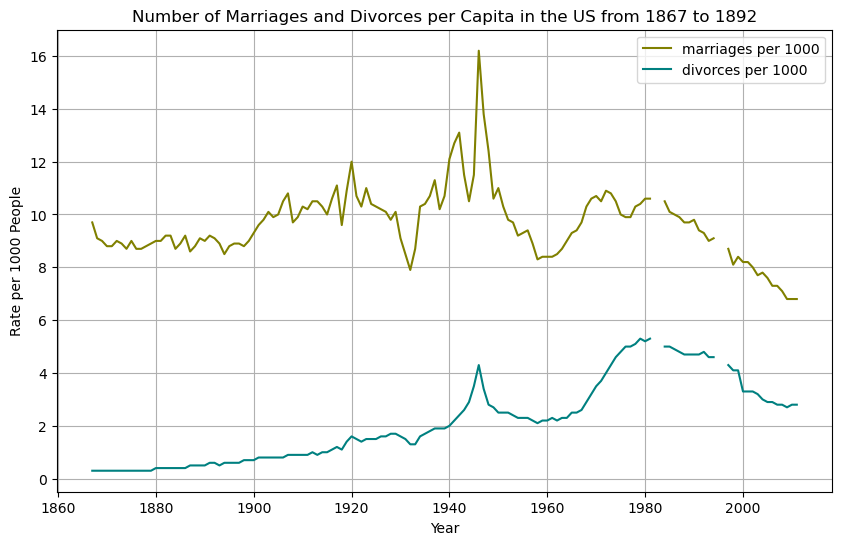

In [603]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
marriages_data = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.plot(df['Year'], marriages_data['Marriages_per_1000'], label='marriages per 1000', color='olive')
plt.plot(df['Year'], marriages_data['Divorces_per_1000'], label='divorces per 1000', color='teal')

plt.xlabel('Year')
plt.ylabel('Rate per 1000 People')
plt.title('Number of Marriages and Divorces per Capita in the US from 1867 to 1892')
plt.legend()

plt.grid(True)
plt.show()


## Question 7

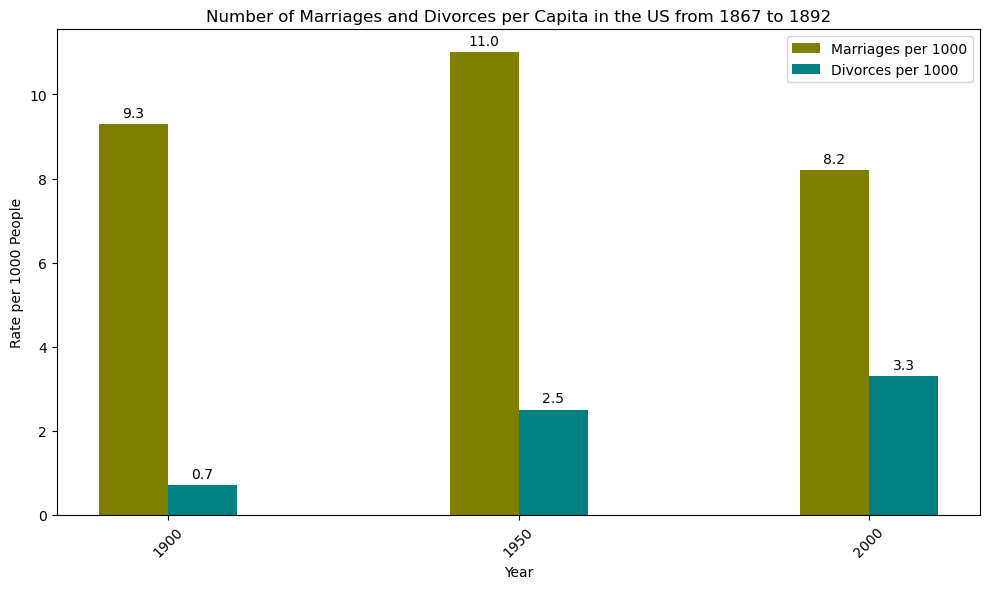

In [607]:
import pandas as pd
import matplotlib.pyplot as plt

marriages_data_filtered = marriages_data[marriages_data['Year'].isin([1900, 1950, 2000])]

fig, ax = plt.subplots(figsize=(10, 6))

bar_width_cm = 25  
bar_width_inch = bar_width_cm / 2.54  

x = marriages_data_filtered['Year']

bars_marriages = ax.bar(x - bar_width_inch/2, marriages_data_filtered['Marriages_per_1000'], bar_width_inch, label='Marriages per 1000', color='olive')
bars_divorces = ax.bar(x + bar_width_inch/2, marriages_data_filtered['Divorces_per_1000'], bar_width_inch, label='Divorces per 1000', color='teal')

for bar in bars_marriages:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.1f}', ha='center', va='bottom')

for bar in bars_divorces:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.1f}', ha='center', va='bottom')

ax.set_xlabel('Year')
ax.set_ylabel('Rate per 1000 People')
ax.set_title('Number of Marriages and Divorces per Capita in the US from 1867 to 1892')
ax.legend()

plt.xticks(x, rotation=45)

plt.tight_layout()
plt.show()


## Question 8

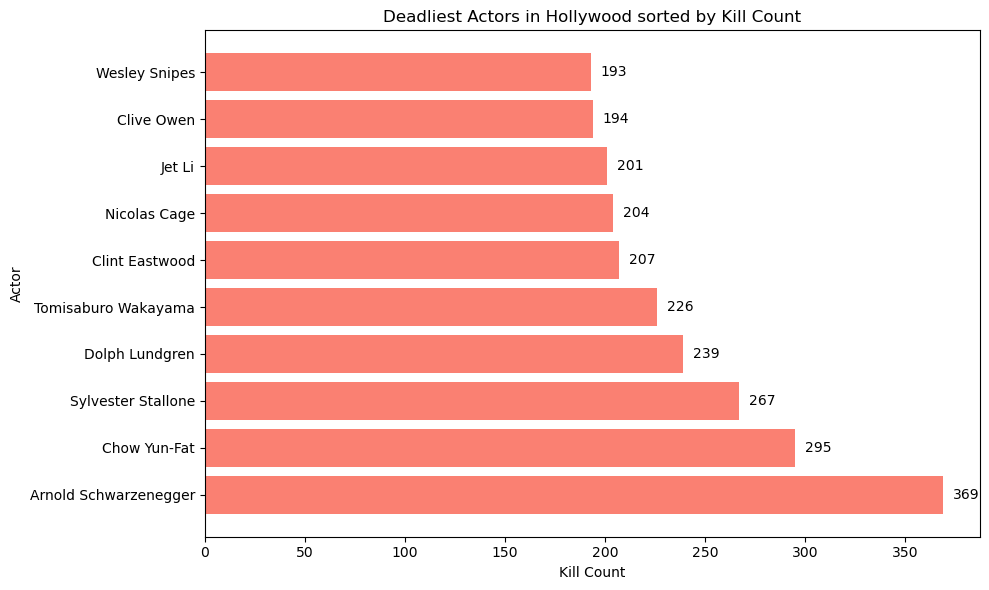

In [617]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('actor_kill_counts.csv')
kll_count = pd.DataFrame(data)

kill_count_sorted = kll_count.sort_values(by='Count', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(kill_count_sorted['Actor'], kill_count_sorted['Count'], color='salmon')

for bar in bars:
    ax.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, 
            f'{bar.get_width()}', va='center', ha='left', color='black')

ax.set_xlabel('Kill Count')
ax.set_ylabel('Actor')
ax.set_title('Deadliest Actors in Hollywood sorted by Kill Count')

plt.tight_layout()
plt.show()


## Question 9

In [620]:
import pandas as pd
import matplotlib.pyplot as plt

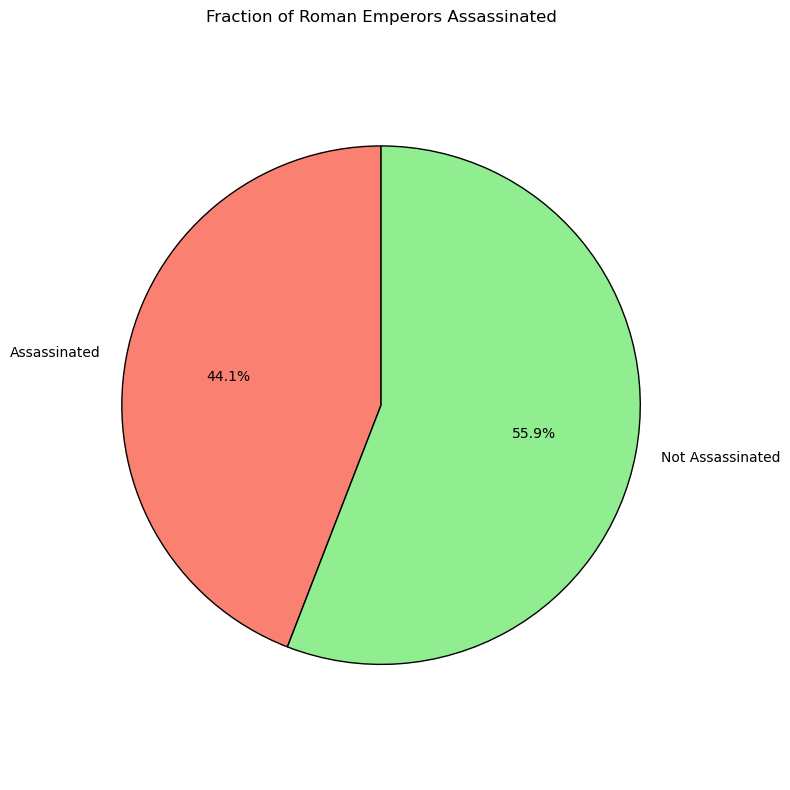

In [626]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('roman-emperor-reigns.csv')
rome = pd.DataFrame(data)

assassinated_count = rome['Cause_of_Death'].str.contains('assassinated', case=False).sum()

not_assassinated_count = (~rome['Cause_of_Death'].str.contains('assassinated', case=False)).sum()

labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated_count, not_assassinated_count]
colors = ['salmon', 'lightgreen']

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

ax.axis('equal')

plt.title('Fraction of Roman Emperors Assassinated')

plt.tight_layout()
plt.show()


## Question 10

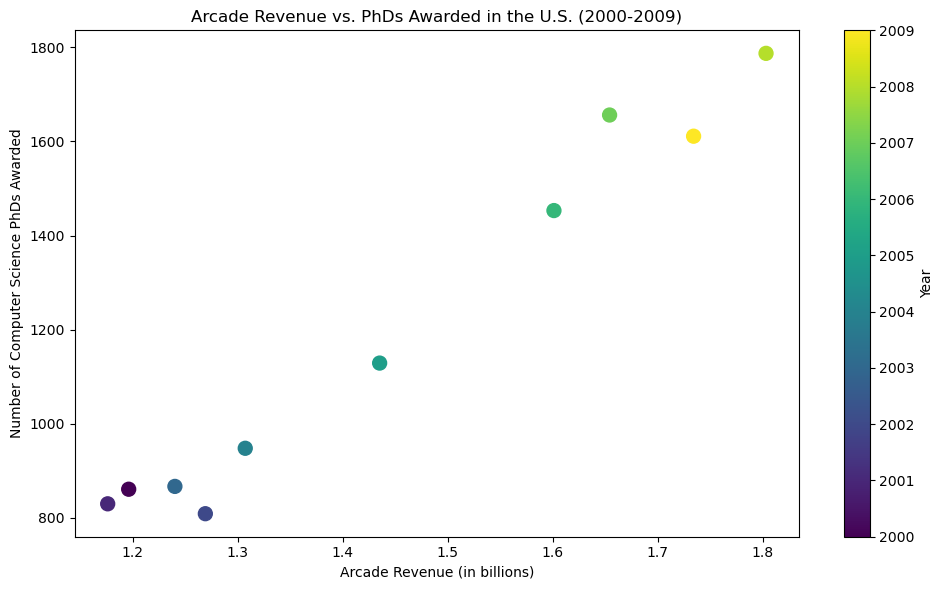

In [635]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
revenue = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.scatter(revenue['Total Arcade Revenue (billions)'], revenue['Computer Science Doctorates Awarded (US)'], 
            c=revenue['Year'], cmap='viridis', s=100)

plt.xlabel('Arcade Revenue (in billions)')
plt.ylabel('Number of Computer Science PhDs Awarded')
plt.title('Arcade Revenue vs. PhDs Awarded in the U.S. (2000-2009)')

plt.colorbar(label='Year')

plt.tight_layout()
plt.show()
